In [25]:
# Importing the libraries
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from keras.optimizers import SGD
import math
from sklearn.metrics import mean_squared_error
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import os
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.optimizers import Adam



In [13]:
# Définir les chemins de tes dossiers
train_dir = "Dogs_vs_Cats/train"
val_dir = "Dogs_vs_Cats/test"

In [14]:
# Générateur avec augmentation pour les images d'entraînement
#(Data Augmentation) permet de rendre le modèle plus robuste en appliquant des transformations aléatoires aux images.
#Améliorer la généralisation du modèle
train_datagen = ImageDataGenerator(
    rescale=1./255,        # Normalisation des pixels (0-1)
    rotation_range=40,     # Rotation aléatoire
    width_shift_range=0.2, # Décalage horizontal
    height_shift_range=0.2,# Décalage vertical
    zoom_range=0.2,        # Zoom aléatoire
    horizontal_flip=True,  # Retournement horizontal
    fill_mode='nearest'    # Remplissage des pixels manquants
)

# Générateur sans augmentation pour la validation
#Tester le modèle sur des images "normales"
#les images de validation servent uniquement à tester la performance du modèle.
val_datagen = ImageDataGenerator(rescale=1./255)


In [15]:
# Générateur pour l'entraînement
train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(150, 150),  # Redimensionner toutes les images à 150x150
    batch_size=32,
    class_mode='binary'  # "binary" car 2 classes : Chats et Chiens
)

# Générateur pour la validation
val_generator = val_datagen.flow_from_directory(
    val_dir,
    target_size=(150, 150),
    batch_size=32,
    class_mode='binary'
)


Found 21840 images belonging to 1 classes.
Found 12500 images belonging to 1 classes.


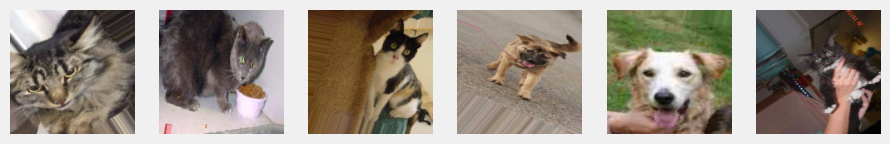

In [23]:
# Obtenir un batch d'images augmentées
x_batch, y_batch = next(train_generator)

# Afficher quelques images transformées
plt.figure(figsize=(10, 6))
for i in range(6):
    plt.subplot(1, 6, i+1)
    plt.imshow(x_batch[i])
    plt.axis('off')
plt.show()

In [28]:
model = Sequential()
    # Première couche convolutive + MaxPooling
model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(150, 150, 3)))  # 32 filtres, taille de noyau 3x3
model.add(MaxPooling2D(pool_size=(2, 2)))  # MaxPooling pour réduire la taille spatiale

    # Deuxième couche convolutive + MaxPooling
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

    # Troisième couche convolutive + MaxPooling
model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Flatten())

    # Couche entièrement connectée avec 512 unités et activation ReLU
model.add(Dense(512, activation='relu'))

    # Dropout pour réduire le surajustement
model.add(Dropout(0.5))  # Taux de dropout de 50%

    # Couche de sortie avec 1 unité et activation sigmoïde pour la classification binaire
model.add(Dense(1, activation='sigmoid'))

    # 5. Compiler le modèle
model.compile(optimizer=Adam(),
                loss='binary_crossentropy',
                metrics=['accuracy'])

    # 6. Afficher le résumé du modèle
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 148, 148, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2  (None, 74, 74, 32)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 72, 72, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 36, 36, 64)        0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 34, 34, 128)       73856     
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 17, 17, 128)       0